In [1]:
# Run in python console
import nltk; nltk.download('stopwords')
import spacy
from spacy.lang.zh.stop_words import STOP_WORDS
stop_words = spacy.lang.zh.stop_words.STOP_WORDS

from spacy.lang.zh.examples import sentences 
# Run in terminal or command prompt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\onrik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 预处理

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
import pandas as pd
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba
import pandas as pd
import re
import csv
# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('chinsesstoptxt.txt',encoding='UTF-8').readlines()]
    return stopwords

# 对句子进行中文分词
def seg_depart(sentence):
    # 对文档中的每一行进行中文分词
    jieba.load_userdict('保留词.txt')
    sentence_depart = jieba.cut(sentence.strip())
    # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

def chinese_word_cut(line):
#     line = processing(line[1])
    line = line.replace(' ','')
    line_seg = seg_depart(line)
    return line_seg

df = pd.read_excel("C:/Users/onrik\\report\\0203_LDA\\人民日报 가공2.xlsx")
# Remove Emails
df['content'] = df['content'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))

# # Remove new line characters
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# # Remove distracting single quotes
df['content'] = df['content'].apply(lambda x: re.sub("\'", "", x))
df['Text_cut'] = df.content.apply(chinese_word_cut)
ddf = df
df

Building prefix dict from the default dictionary ...
2022-03-28 19:15:46,831 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\onrik\AppData\Local\Temp\jieba.cache
2022-03-28 19:15:46,831 : DEBUG : Loading model from cache C:\Users\onrik\AppData\Local\Temp\jieba.cache
Loading model cost 0.618 seconds.
2022-03-28 19:15:47,449 : DEBUG : Loading model cost 0.618 seconds.
Prefix dict has been built successfully.
2022-03-28 19:15:47,450 : DEBUG : Prefix dict has been built successfully.


,title,date,content,Text_cut
0,个人信息保护法如何捍卫个人信息安全,2021-09-14,个人信息保护法自8月20日经十三届全国人大常委会第三十次会议表决通过以来，社会各界对其关注度...,个人信息保护法 月 日经 十三届 全国人大常委会 第三十次 会议 表决 社会各界 关注度 与...
1,个人信息保护法落地满月，我们的信息还在“裸奔”吗,2021-12-03,本报记者王井怀、刘惟真备受瞩目的《中华人民共和国个人信息保护法》落地满一个月，我们的个人信息...,本报记者 王井怀 刘惟真 备受瞩目 中华人民共和国 个人信息保护法 落地 一个月 个人信息 ...
2,应从产业促进角度理解个人信息保护法,2021-11-05,11月1日，个人信息保护法正式实施，结合9月1日施行的数据安全法，数据安全领域的法律框架正在...,11 月 日 个人信息保护法 正式 实施 月 日 施行 数据安全法 数据安全 领域 法律 框...
3,个人信息保护法与科技合作研讨会在丹麦举行,2021-10-27,新华社哥本哈根10月26日电（记者林晶）丹麦科技创业中心（上海）联合中丹科教中心26日在哥本...,新华社 哥本哈根 10 月 26 日电 记者 林晶 丹麦 科技 创业 中心 上海 联合 中 ...
4,【中国人民银行】人行拉萨中支组织学习 《个人信息保护法》,2021-12-07,《个人信息保护法》实施后，人行拉萨中支为了更好地履行职能，通过“线上＋线下”双模式开展多方位...,个人信息保护法 实施 人行 拉萨 中 支 更好 履行 职能 线上 线下 双模式 多方位 个人...
...,...,...,...,...
274,强化法治监管 筑牢网络安全防线,2021-08-25,8月24日，国务院新闻办举行政策例行吹风会。就《关键信息基础设施安全保护条例》（以下简称《条...,月 24 日 国务院新闻办 政策 例行 吹风会 关键 信息 基础设施 保护 条例 简称 条例...
275,筑牢数字安全屏障（人民观点）,2021-10-25,如今的网络安全，内涵和外延不断拓展，不仅关乎个人安全、企业安全，也关乎国家安全，已经成为社会...,网络安全 内涵 外延 拓展 关乎 企业 关乎 国家 社会 治理 国家 治理 议题 网络安全 ...
276,四川省市场监督管理局：坚持党建引领 强化数据安全,2021-12-08,人民网成都12月8日电 近日，四川省市场监督管理局召开加强政务信息化建设数据安全管理座谈会。...,人民网 成都 12 月 日电 近日 四川省 市场 监督 管理局 政务 信息化 建设 数据安全...
277,人脸识别，“不同意就不提供服务”？最高法：违法！,2021-07-28,人民网北京7月28日电 （记者徐隽）最高人民法院28日举行新闻发布会，发布《最高人民法院关于...,人民网 北京 月 28 日电 记者 徐隽 最高人民法院 28 日 新闻 发布会 发布 最高人...


In [5]:
data = df.Text_cut.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[1:2])


[['本报记者', '王井怀', '刘惟真', '备受瞩目', '中华人民共和国', '个人信息保护法', '落地', '一个月', '个人信息', '裸奔', '记者', '调研', '发现', '买房', '信息', '泄露', 'app', '过度', '收集', '信息', '视频', '平台', '索要', '会员', '照片', '现象', '身边', '多位', '专家', '我国', '个人信息', '保护', '工作', '不断完善', '隐私', '泄露', '难以', '短时间', '急刹车', '进一步', '保护', '个人信息', '任重道远', '个人信息', '裸奔', '中旬', '记者', '连续', '接到', '装修', '公司', '电话', '记者', '姓氏', '询问', '装修', '通话', '报出', '记者', '前段时间', '购买', '新房', '小区', '位置', '一家', '知晓', '户型', '信息', '记者', '公司', '负责', '客户', '中华人民共和国', '个人信息保护法', '实施', '已满', '一个月', '记者', '调研', '发现', '类似', '个人信息', '泄露', '情况', '时有发生', '国家', '互联网', '管理中心', '数据', '显示', 'app', '发现', '隐私', '合规', '不乏', '多点', '亚马逊', '购物', '安装', '超过', '千万次', '热门', 'app', '隐私', '合规', '指向', '第三方', '提供', '个人信息', '时未', '匿名', '未向', '用户', '明示', '申请', '隐私', '权限', '征得', '用户', '同意', '收集', '个人信息', '国家', '计算机病毒', '应急', '中心', '相关', '负责人', '解释', '深恶痛绝', '数据', '杀熟', '销声匿迹', '日前', '记者', '尝试', '同一时间', '平台', '店铺', '手机', '下单', '三杯', '奶茶', '发现', '下过', '手机', '费用', '数次', '下单', '手机', '消费者', '服务平台', '黑猫', '投诉',

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('zh_core_web_sm')
# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])
data_lemmatized = data_words_bigrams

In [9]:
data_lemmatized

[['个人信息保护法',
  '日经',
  '十三届_全国人大常委会',
  '第三十次_会议',
  '表决',
  '社会各界',
  '关注度',
  '与日俱增',
  '制定',
  '个人信息保护法',
  '个人信息保护法',
  '生活',
  '影响',
  '个人信息保护法',
  '强化',
  '敏感',
  '个人信息',
  '保护',
  '业内',
  '专家',
  '近日',
  '接受',
  '法治',
  '日报',
  '记者',
  '采访',
  '详解',
  '个人信息保护法',
  '创新',
  '特色',
  '规则',
  '亮点',
  '回应',
  '关切',
  '彰显',
  '时代',
  '印记',
  '个人信息保护法',
  '出台',
  '时代背景',
  '国际',
  '国内',
  '蕴涵',
  '北京师范大学',
  '网络',
  '法治',
  '国际',
  '中心_执行',
  '主任',
  '中国',
  '互联网',
  '协会',
  '研究_中心',
  '主任',
  '吴沈括',
  '吴沈括',
  '指出',
  '数字_经济',
  '蓬勃发展',
  '世界',
  '各国',
  '重视',
  '个人信息',
  '多重',
  '价值',
  '属性',
  '纷纷',
  '出台',
  '个人信息',
  '保护',
  '立法',
  '个人信息',
  '法律',
  '保护',
  '衡量',
  '一国',
  '法治',
  '文明',
  '法治',
  '水平',
  '指针',
  '我国',
  '处于',
  '数字化_转型',
  '高质量_发展',
  '阶段',
  '个人信息',
  '社会',
  '产业',
  '升级',
  '驱动力',
  '制定',
  '个人信息保护法',
  '保障',
  '公民',
  '个人信息',
  '权益',
  '个人信息',
  '利用',
  '举措',
  '个人信息保护法',
  '条文',
  '内容',
  '立法者',
  '吸收',
  '接轨',
  '国际',
  '立法',
  '探索',
  '开创',
  '中国',
  '路径',
 

### TF-IDF

In [10]:
### Term-Frequency
from collections import Counter
words = ''
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    words += t
words = words.split()
counts = Counter(words)
counts

Counter({'个人信息保护法': 630,
         '日经': 1,
         '十三届_全国人大常委会': 25,
         '第三十次_会议': 8,
         '表决': 5,
         '社会各界': 9,
         '关注度': 8,
         '与日俱增': 1,
         '制定': 149,
         '生活': 118,
         '影响': 137,
         '强化': 138,
         '敏感': 206,
         '个人信息': 3127,
         '保护': 1704,
         '业内': 6,
         '专家': 82,
         '近日': 72,
         '接受': 67,
         '法治': 154,
         '日报': 5,
         '记者': 278,
         '采访': 41,
         '详解': 1,
         '创新': 86,
         '特色': 16,
         '规则': 296,
         '亮点': 12,
         '回应': 67,
         '关切': 18,
         '彰显': 8,
         '时代': 154,
         '印记': 2,
         '出台': 150,
         '时代背景': 2,
         '国际': 61,
         '国内': 49,
         '蕴涵': 1,
         '北京师范大学': 7,
         '网络': 479,
         '中心_执行': 5,
         '主任': 79,
         '中国': 222,
         '互联网': 466,
         '协会': 20,
         '研究_中心': 36,
         '吴沈括': 10,
         '指出': 93,
         '数字_经济': 143,
         '蓬勃发展': 9,
  

In [11]:
vocab = sorted(counts, key=counts.get, reverse=True)
tf_df = []
for voca in vocab:
    tf_df.append({'word': voca, 'term frequency': counts[voca]})
tf_df = pd.DataFrame(tf_df)
tf_df.head(10)

,word,term frequency
0,个人信息,3127
1,信息,1918
2,保护,1704
3,数据,1278
4,用户,908
5,app,891
6,收集,801
7,相关,645
8,个人信息保护法,630
9,技术,578


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
contents_tfidf = []
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    contents_tfidf.append(t)
vectorizer = TfidfVectorizer(max_features= 100)
X = vectorizer.fit_transform(contents_tfidf)

# # TF-IDF 행렬의 크기 확인
# print('TF-IDF 행렬의 크기 :',X.shape)
tf_idfdict=  vectorizer.get_feature_names()
data_array = X.toarray()
data_tdidf = pd.DataFrame(data_array, columns=tf_idfdict)
data_tdidf


,app,个人信息,个人信息保护法,中国,主体,互联网,人脸,人脸识别,企业,体系,...,诈骗,责任,进一步,部门,采集,金融,隐私,非法,领域,风险
0,0.000000,0.564821,0.257056,0.067478,0.072729,0.017569,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065280,0.000000,0.000000,0.000000,0.027594,0.022493,0.119968,0.021559,0.000000
1,0.250080,0.459063,0.071224,0.034277,0.000000,0.080320,0.000000,0.000000,0.188918,0.037934,...,0.042576,0.000000,0.117692,0.028932,0.039200,0.000000,0.308494,0.000000,0.032854,0.000000
2,0.000000,0.140049,0.239016,0.000000,0.045083,0.098014,0.000000,0.000000,0.625741,0.092581,...,0.000000,0.040465,0.071810,0.000000,0.000000,0.000000,0.000000,0.000000,0.120275,0.000000
3,0.000000,0.093224,0.173566,0.584708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070504,0.000000,0.000000,0.000000,0.000000,0.080062,0.000000
4,0.000000,0.271681,0.252910,0.000000,0.000000,0.000000,0.000000,0.154086,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.139197,0.447961,0.000000,0.000000,0.116661,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.000000,0.032907,0.015317,0.000000,0.158900,0.023031,0.000000,0.000000,0.046431,0.032631,...,0.000000,0.256723,0.050620,0.049775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
275,0.025254,0.030905,0.014385,0.027691,0.000000,0.129774,0.000000,0.000000,0.065408,0.061290,...,0.068791,0.026789,0.000000,0.023373,0.000000,0.000000,0.055382,0.029539,0.053083,0.053083
276,0.000000,0.000000,0.029610,0.000000,0.000000,0.000000,0.000000,0.000000,0.179520,0.000000,...,0.000000,0.165431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054634,0.109269
277,0.024631,0.165787,0.014030,0.000000,0.000000,0.000000,0.530074,0.649644,0.042531,0.000000,...,0.033547,0.026129,0.023184,0.000000,0.061776,0.000000,0.027009,0.028811,0.025887,0.000000


In [13]:
def getTFIDF(text_series):
    """Performs TF-IDF calculation on a matrix of words grouped into cells."""
    vectorizer = TfidfVectorizer()

    matrix = vectorizer.fit_transform(text_series).todense()

    matrix_df = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())


    return matrix_df.sum(axis=0).sort_values(ascending=False)

# # Create Corpus for TD-IDF analysis 
text_df = pd.DataFrame()
text_df["text_clean"] = data_lemmatized # Use the data_lemmatized for text analysis
text_to_tfidf = [",".join(text) for text in text_df["text_clean"].values]

# Getting TD-IDF scores for words 
topwords = getTFIDF(text_to_tfidf)
topwords.to_excel("topwords.xlsx")
topwords_50 = topwords[:50]
topwords_50.to_excel("人民日报_topwords_tf_idf_50.xlsx")

In [14]:
topwords

个人信息    31.482064
信息      19.223854
保护      17.837953
数据      15.510443
app     14.905816
          ...    
预装       0.008536
专业知识     0.008536
水利       0.008536
第五十      0.008536
第二款      0.008536
Length: 11761, dtype: float64

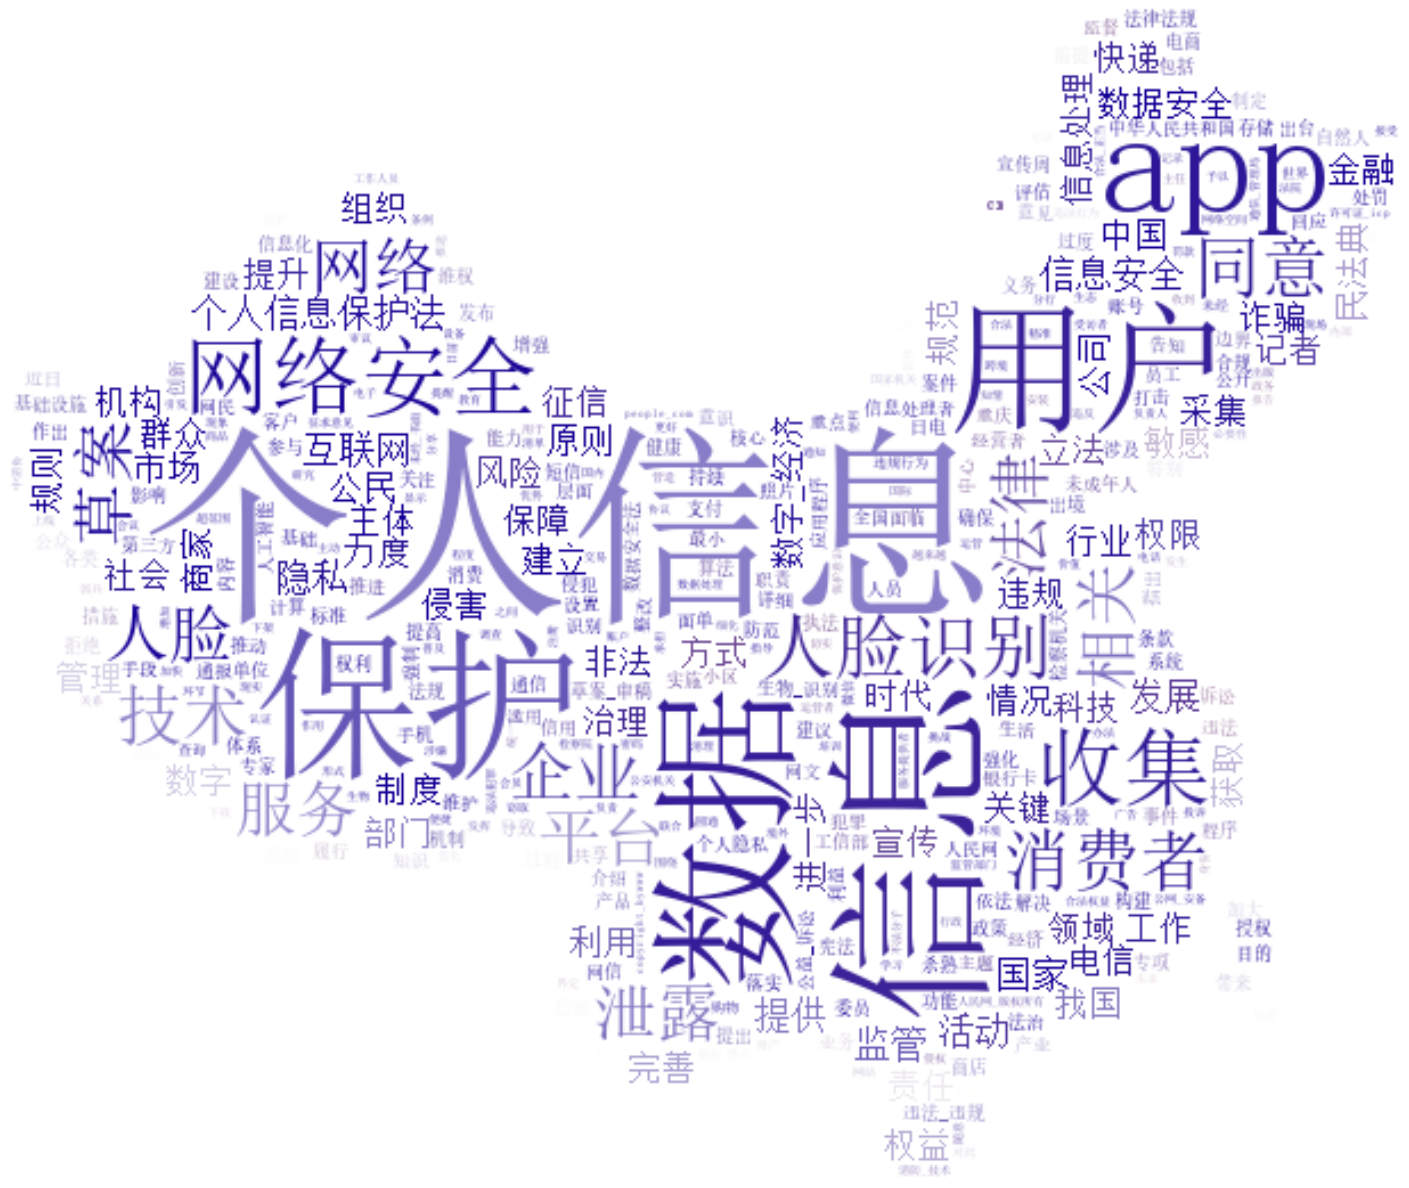

In [15]:
# Importing word cloud
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from PIL import Image

## Creating a masked wordcloud using TD-IDF
fig, ax = plt.subplots(figsize=(25,25))
custom_mask = np.array(Image.open("china4.jpg"))
w = WordCloud(font_path='C:\\Windows\\Fonts\\simsun.ttc',
              background_color = 'white',
              width=800,height=600,
              mask = custom_mask,
              mode='RGBA',
              max_words=2000).fit_words(topwords)
image_colors = ImageColorGenerator(custom_mask)
w.recolor(color_func = image_colors)
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('人民日报_TFIDF_Wordcloud.png', dpi=800)

### LDA

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 45), (16, 22), (17, 2), (18, 3), (19, 2), (20, 2), (21, 1), (22, 3), (23, 3), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 5), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 8), (46, 2), (47, 24), (48, 2), (49, 5), (50, 8), (51, 8), (52, 11), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 2), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 3), (69, 4), (70, 3), (71, 4), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1), (81, 2), (82, 3), (83, 11), (84, 1), (85, 1), (86, 2), (87, 3), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 3), (107, 1), (108, 1), (109, 1), (11

In [18]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'mallet-2.0.8/bin/mallet'  # update this path
# mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
import os
os.environ.update({'MALLET_HOME':r'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/'})

mallet_path = 'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path


# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

In [19]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

[(0,
  [('个人信息', 0.0975778915919761),
   ('保护', 0.04801536491677337),
   ('法律', 0.020326504481434058),
   ('个人信息保护法', 0.019472897994024754),
   ('同意', 0.018725992317541615),
   ('草案', 0.017445582586427658),
   ('信息处理', 0.01264404609475032),
   ('权益', 0.01088348271446863),
   ('立法', 0.010189927443448571),
   ('民法典', 0.010083226632522407)]),
 (1,
  [('app', 0.05994752068895916),
   ('个人信息', 0.045683913072730946),
   ('用户', 0.042723541680683576),
   ('收集', 0.035255332032564084),
   ('企业', 0.016618448496265894),
   ('服务', 0.013859920608221759),
   ('互联网', 0.012447016080199153),
   ('信息', 0.011034111552176545),
   ('监管', 0.010159456368162552),
   ('保护', 0.009688488192155016)]),
 (2,
  [('数据', 0.038834951456310676),
   ('国家', 0.020893203883495144),
   ('提供', 0.019106796116504853),
   ('部门', 0.017631067961165047),
   ('数据安全', 0.015223300970873786),
   ('保护', 0.013980582524271845),
   ('服务', 0.013592233009708738),
   ('平台', 0.013514563106796117),
   ('相关', 0.013514563106796117),
   ('个人信息', 0.

In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=2)

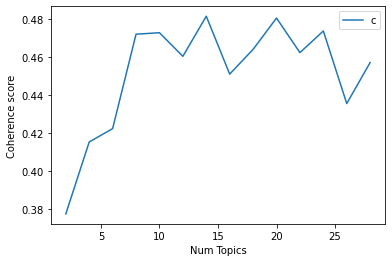

In [22]:
# Show graph
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
model_list

Num Topics = 2  has Coherence Value of 0.3775
Num Topics = 4  has Coherence Value of 0.4154
Num Topics = 6  has Coherence Value of 0.4224
Num Topics = 8  has Coherence Value of 0.4721
Num Topics = 10  has Coherence Value of 0.4728
Num Topics = 12  has Coherence Value of 0.4604
Num Topics = 14  has Coherence Value of 0.4815
Num Topics = 16  has Coherence Value of 0.4511
Num Topics = 18  has Coherence Value of 0.4641
Num Topics = 20  has Coherence Value of 0.4806
Num Topics = 22  has Coherence Value of 0.4624
Num Topics = 24  has Coherence Value of 0.4738
Num Topics = 26  has Coherence Value of 0.4356
Num Topics = 28  has Coherence Value of 0.4572


In [27]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.033*"数据" + 0.018*"国家" + 0.017*"提供" + 0.016*"部门" + 0.014*"信息" + 0.014*"服务" '
  '+ 0.014*"保护" + 0.013*"数据安全" + 0.011*"征信" + 0.011*"互联网" + 0.010*"个人信息" + '
  '0.010*"相关" + 0.010*"网信" + 0.010*"机构" + 0.010*"数据处理" + 0.009*"关键" + '
  '0.009*"评估" + 0.008*"平台" + 0.008*"情况" + 0.008*"业务"'),
 (1,
  '0.028*"个人信息" + 0.027*"信息" + 0.021*"泄露" + 0.018*"诈骗" + 0.018*"网络" + '
  '0.016*"公民" + 0.015*"保护" + 0.010*"电信" + 0.010*"企业" + 0.009*"相关" + '
  '0.009*"信息安全" + 0.008*"案件" + 0.007*"非法" + 0.007*"力度" + 0.007*"快递" + '
  '0.007*"打击" + 0.006*"犯罪" + 0.005*"加大" + 0.005*"导致" + 0.005*"建议"'),
 (2,
  '0.058*"信息" + 0.037*"人脸识别" + 0.027*"人脸" + 0.025*"技术" + 0.020*"采集" + '
  '0.009*"信息安全" + 0.008*"生物_识别" + 0.007*"消费者" + 0.007*"风险" + 0.007*"收集" + '
  '0.007*"相关" + 0.007*"识别" + 0.007*"原则" + 0.006*"支付" + 0.006*"泄露" + 0.005*"记者" '
  '+ 0.005*"照片" + 0.005*"企业" + 0.005*"小区" + 0.005*"设备"'),
 (3,
  '0.056*"数据" + 0.027*"发展" + 0.023*"保护" + 0.014*"中国" + 0.013*"数字" + 0.011*"技术" '
  '+ 0.010*"隐私" + 0.010*"数据安全" + 0.010*"我国"

In [28]:
ldadf = []
for i in range(len(optimal_model.print_topics(num_words= 20))):
    topic = optimal_model.print_topics(num_words= 20)[i]
    topic_num = 'topic' + ' ' + str(i+1)
    for j in range(len(topic[1].split(" + "))):
        term = topic[1].split(" + ")[j].split("*")[1][1:-1]
        ldanum = topic[1].split(" + ")[j].split("*")[0]
        ldadf.append({"topic": topic_num, 'term':term, 'lda_num':ldanum})
ldadf = pd.DataFrame(ldadf)
print(len(ldadf), ldadf.term.nunique())
ldadf

160 111


,topic,term,lda_num
0,topic 1,数据,0.033
1,topic 1,国家,0.018
2,topic 1,提供,0.017
3,topic 1,部门,0.016
4,topic 1,信息,0.014
...,...,...,...
155,topic 8,方式,0.008
156,topic 8,信息处理者,0.008
157,topic 8,利用,0.008
158,topic 8,权利,0.007


In [26]:
# Visualize the topics
# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis

AttributeError: 'LdaMallet' object has no attribute 'inference'

In [29]:
ldadf.to_excel("人民日报 LDAdf_final2.xlsx", index=False)

In [30]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.6432,"个人信息, 保护, 法律, 同意, 个人信息保护法, 草案, 信息, 信息处理, 规则, 权益",个人信息保护法 月 日经 十三届 全国人大常委会 第三十次 会议 表决 社会各界 关注度 与...
1,1,5.0,0.2955,"消费者, 平台, 用户, 信息, 商家, 个人信息, 快递, 短信, 经营者, 提供",本报记者 王井怀 刘惟真 备受瞩目 中华人民共和国 个人信息保护法 落地 一个月 个人信息 ...
2,2,3.0,0.4458,"数据, 发展, 保护, 中国, 数字, 技术, 隐私, 数据安全, 数字_经济, 我国",11 月 日 个人信息保护法 正式 实施 月 日 施行 数据安全法 数据安全 领域 法律 框...
3,3,3.0,0.4578,"数据, 发展, 保护, 中国, 数字, 技术, 隐私, 数据安全, 数字_经济, 我国",新华社 哥本哈根 10 月 26 日电 记者 林晶 丹麦 科技 创业 中心 上海 联合 中 ...
4,4,6.0,0.3146,"网络安全, 活动, 工作, 网络, 宣传, 国家, 法治, 群众, 组织, 个人信息保护法",个人信息保护法 实施 人行 拉萨 中 支 更好 履行 职能 线上 线下 双模式 多方位 个人...
5,5,6.0,0.5737,"网络安全, 活动, 工作, 网络, 宣传, 国家, 法治, 群众, 组织, 个人信息保护法",日前 中华人民共和国 个人信息保护法 正式 出台 强化 个人信息 保护 管理 严守 法律 底...
6,6,5.0,0.2933,"消费者, 平台, 用户, 信息, 商家, 个人信息, 快递, 短信, 经营者, 提供",备受瞩目 中华人民共和国 个人信息保护法 落地 一个月 个人信息 裸奔 记者 调研 发现 买...
7,7,7.0,0.3438,"个人信息, 保护, 法律, 同意, 个人信息保护法, 草案, 信息, 信息处理, 规则, 权益",个人信息 数字 资产 个人信息 保护 规范 个人信息 获取 事关 权益 维护 关系 数字 经...
8,8,7.0,0.4590,"个人信息, 保护, 法律, 同意, 个人信息保护法, 草案, 信息, 信息处理, 规则, 权益",10 月 12 日 全国人大常委会法工委 发言人 臧铁伟 记者会 介绍 个人信息保护法 草案...
9,9,7.0,0.6066,"个人信息, 保护, 法律, 同意, 个人信息保护法, 草案, 信息, 信息处理, 规则, 权益",市里 打车 起点 终点 手机 型号 朋友 车费 湖南 长沙 李女士 奇怪 数据 杀熟 点击 ...


In [31]:
df_dominant_topic.to_excel("人民日报_토픽별docu.xlsx",index=False)

### NER

In [32]:
import spacy
from spacy import displacy
import en_core_web_sm

nlp = en_core_web_sm.load()
def NER(lst):
    doc = nlp(lst)
    NERlst = []
    for X in doc.ents:
    #     NERlst.append((X.text, X.label_))
        if X.label_ == 'ORG':
            NERlst.append(X.text)

    return NERlst
qq =  df

qq['content'] = data_words_nostops
nlpdf = qq[['content']]
de_doc = []
for i in range(len(data_words_nostops)):
    t = ' '.join(data_words_nostops[i])
    de_doc.append(t)
qq['content'] = de_doc
nlpdf = qq[['content']]    
nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))
nlpdf

<ipython-input-32-939e1312cae3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))


,content,NER result
0,个人信息保护法 日经 十三届 全国人大常委会 第三十次 会议 表决 社会各界 关注度 与日俱...,"[数字化 转型 高质量, 深入开展 置身, 程啸 这部, 民商事]"
1,本报记者 王井怀 刘惟真 备受瞩目 中华人民共和国 个人信息保护法 落地 一个月 个人信息 ...,"[平台 索要 会员 照片, 平台 机构 有恃无恐 违法, 财经大学, 机构 个人信息, 自觉..."
2,个人信息保护法 正式 实施 施行 数据安全法 数据安全 领域 法律 框架 建立 完善 个人信...,[个人信息 数据分析 一类]
3,新华社 哥本哈根 日电 记者 林晶 丹麦 科技 创业 中心 上海 联合 科教 中心 哥本哈根...,[]
4,个人信息保护法 实施 人行 拉萨 更好 履行 职能 线上 线下 双模式 多方位 个人信息保护...,[人民银行 系统 余人次]
...,...,...
274,国务院新闻办 政策 例行 吹风会 关键 信息 基础设施 保护 条例 简称 条例 情况 国家 ...,"[办公室 主任 荣华 工信部, 深入开展 关键, 深入开展 关键, 关键, 局局长 孙蔚敏 ..."
275,网络安全 内涵 外延 拓展 关乎 企业 关乎 国家 社会 治理 国家 治理 议题 网络安全 ...,"[网络安全 内涵 外延 拓展 关乎 企业, 关键]"
276,人民网 成都 日电 近日 四川省 市场 监督 管理局 政务 信息化 建设 数据安全 管理 座...,[高度重视 数据安全 依法 依规]
277,人民网 北京 日电 记者 徐隽 最高人民法院 新闻 发布会 发布 最高人民法院 审理 人脸识...,"[自然人, 带来 个人信息, 凸显, 带来 个人信息, 自然人, 虚开 增值税 普通发票]"


In [33]:
from nltk.probability import FreqDist
NERll = nlpdf['NER result'].sum()
fdist = FreqDist(NERll)
top_20 = fdist.most_common(20)
top_20

[('自然人', 27),
 ('数字化', 11),
 ('发布会', 9),
 ('平台 个人信息', 8),
 ('sec', 8),
 ('当事人', 7),
 ('关键', 7),
 ('围绕 网络安全', 6),
 ('一揽子', 5),
 ('丁晓东', 5),
 ('法律法规 个人信息', 5),
 ('机构 个人信息', 4),
 ('水稻 基地 农机 收割', 4),
 ('机构 机构', 3),
 ('出生日期 身份', 3),
 ('消费者 个人信息', 3),
 ('带来 个人信息', 3),
 ('输入', 3),
 ('检察机关 个人信息', 3),
 ('机构 个人信息 保护', 3)]